# GPAO I
 Throughout the M\"uller Brown example, we are going to manually perform one image method (OIM) (https://aip.scitation.org/doi/10.1063/1.4986787). Where we optimize the pathway using minimum calculation of actual potential.


## Previously on Muller Brown II



Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    135    160    160   5.2463   1.3235
converg :    137    183    183   5.2376   0.3265
jac_max > tol(0.01); Run without gradient
converg :    138    206    206   5.2376   0.3265


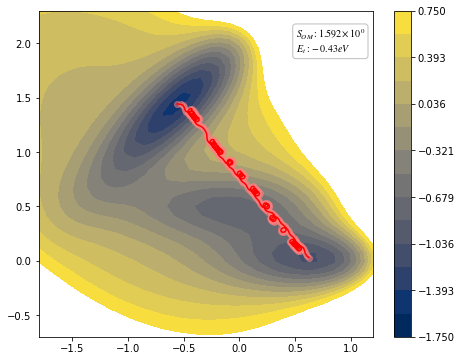

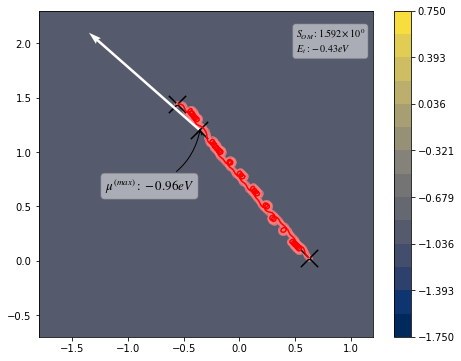

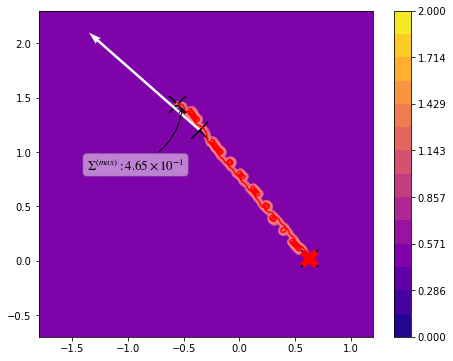

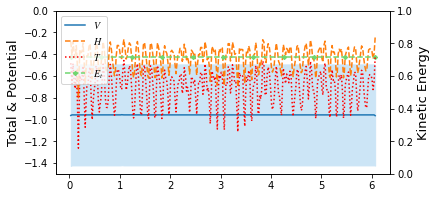

In [1]:
import numpy as np
from taps.paths import Paths
from taps.pathfinder import DAO
from taps.model import MullerBrown
from taps.coords import Cartesian
from taps.visualize import view
from taps.db.data import ImageData
from taps.projectors import Sine

N = 300
Nk = N - 210

x = np.linspace(-0.55822365, 0.6234994, N)
y = np.linspace(1.44172582, 0.02803776, N)

coords = Cartesian(coords=np.array([x, y]))
model = MullerBrown()
from taps.ml.gaussian import Gaussian
hyperparameters = {'sigma_f': 1, 'sigma_n^f': 1e-8, 'sigma_n^e':1e-6,
                   'l^2': 0.1}
hyperparameters_bounds = {'sigma_f': (1e-4, 4), 'sigma_n^f': (1e-8, 1e-6), 'sigma_n^e':(1e-6, 1e-4), 'l^2': (1e-4, 4)}


model = Gaussian(real_model=model,
                 hyperparameters=hyperparameters,
                 hyperparameters_bounds=hyperparameters_bounds)
imgdata = ImageData("mullerbrown.db")



search_kwargs = {"method":"L-BFGS-B",
                  "options": {'disp': None,
                              'maxcor': 20,
                              'ftol': 2.220446049250313e-4,
                              'gtol': 1e-03,
                              'eps': 5e-6, 
                              'maxfun': 1000,
                              'maxiter': 1000,
                              'iprint': -1, 'maxls': 100,
                              'finite_diff_rel_step': 1e-6}}


prj = Sine(N=N, Nk=Nk, init=coords[:, 0].copy(), fin=coords[:, -1].copy())

finder = DAO(Et=-0.43, muE=1., tol=1e-2, gam=1.,
             action_name = ['Onsager Machlup', "Energy conservation"],
             prj_search=True,
             search_kwargs=search_kwargs, 
             prj=prj)

paths = Paths(coords=coords, model=model, imgdata=imgdata, finder=finder)

paths.coords.epoch=6
paths.add_data(index=[0, 50, -1])
paths.search()

view(paths, viewer='MullerBrown', gaussian=True)

## One Image Method

Process of OIM is following 
1. Optimization on Gaussian PES
2. Add data having maximum uncertainty

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    163    235    235   5.3529   0.2297
converg :    165    263    263   5.3515   0.6377
jac_max > tol(0.01); Run without gradient
converg :    166    283    283   5.3515   0.6377


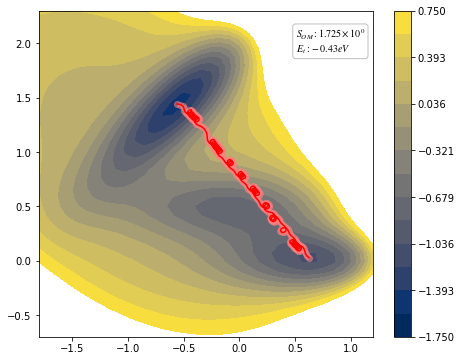

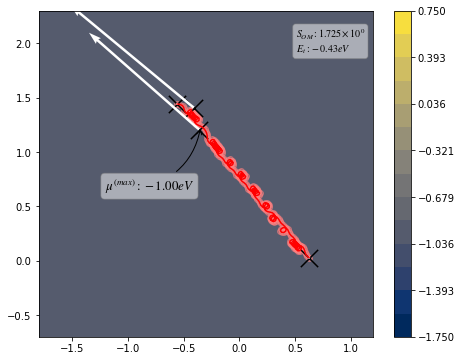

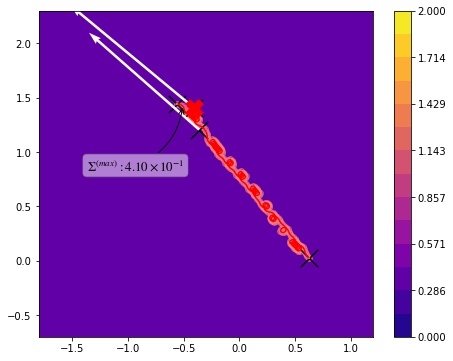

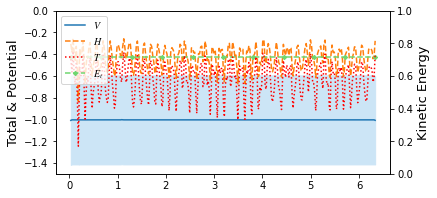

In [2]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    445    566    566   2.6968   0.6160
converg :    447    571    571   2.6961   0.1635
jac_max > tol(0.01); Run without gradient
converg :    448    575    575   2.6958   0.4078


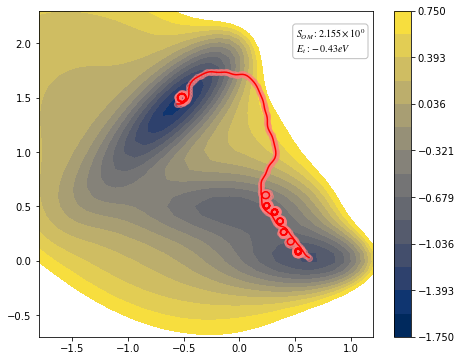

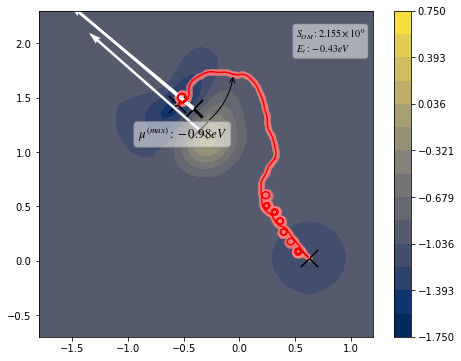

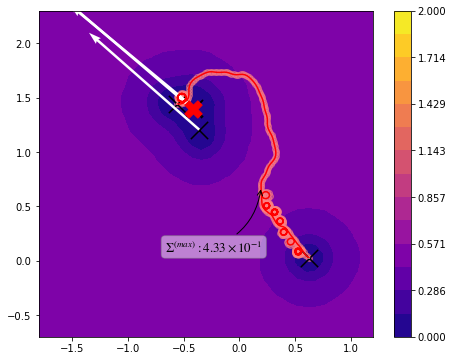

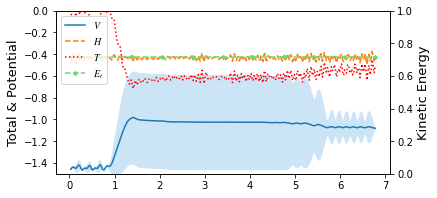

In [3]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    702    842    842   2.7690   0.5585
converg :    703    846    846   2.7684   0.2108
jac_max > tol(0.01); Run without gradient
converg :    704    850    850   2.7681   0.3868


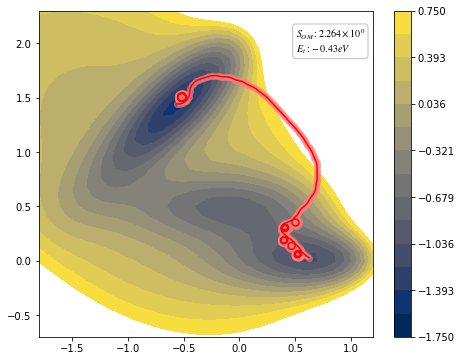

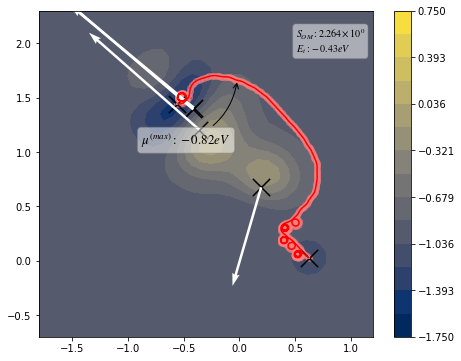

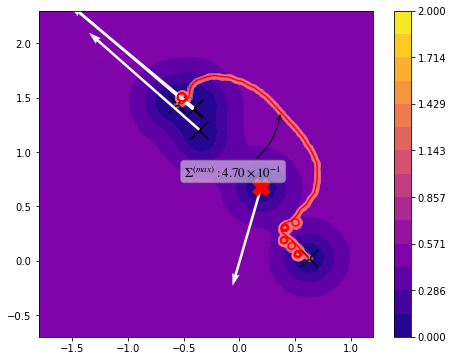

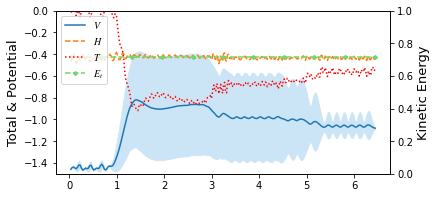

In [4]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    868   1021   1021  18.8320   1.1267
converg :    869   1025   1025  18.8283   0.7103
jac_max > tol(0.01); Run without gradient
converg :    870   1029   1029  18.8274   0.3852


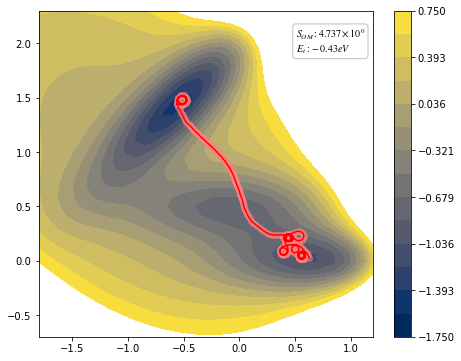

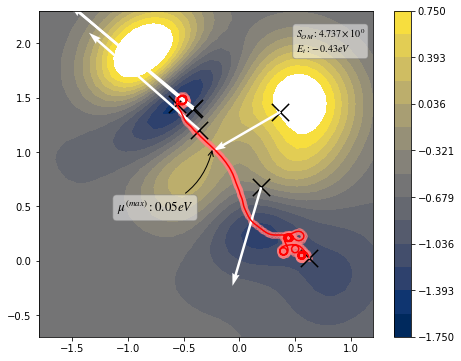

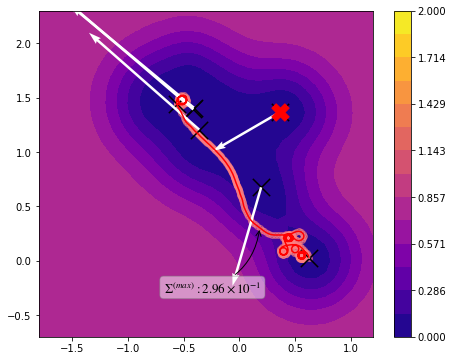

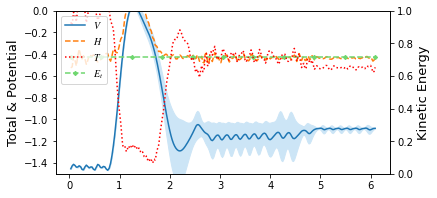

In [5]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    922   1085   1085  16.9227   0.9120
converg :    923   1089   1089  16.9203   1.6974
jac_max > tol(0.01); Run without gradient
converg :    924   1093   1093  16.9169   0.5452


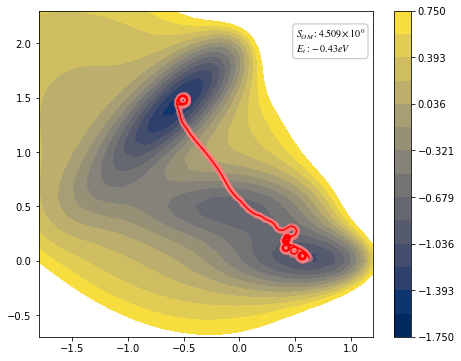

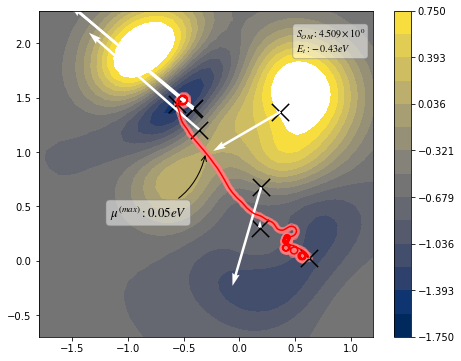

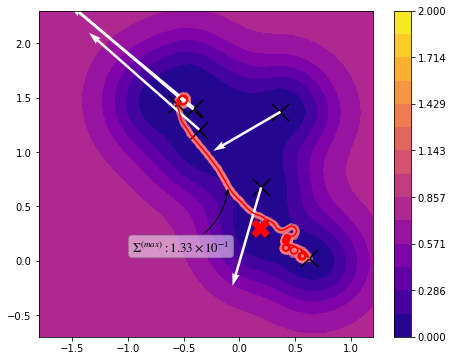

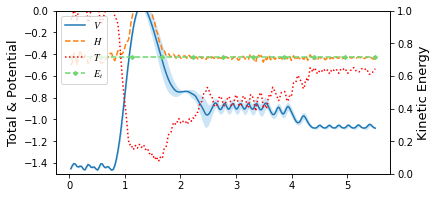

In [6]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :   1187   1365   1365   3.1280   0.3098
converg :   1188   1369   1369   3.1279   0.2238
jac_max > tol(0.01); Run without gradient
converg :   1189   1373   1373   3.1276   0.1862


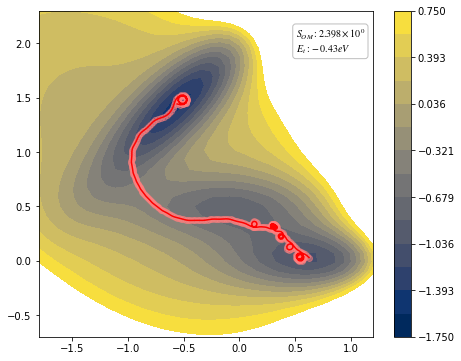

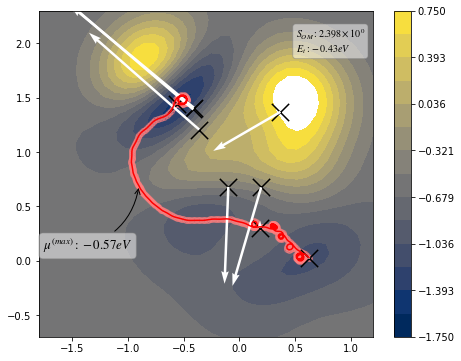

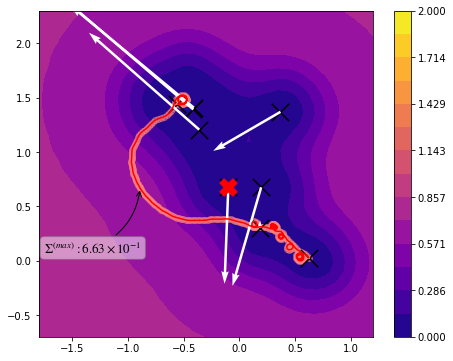

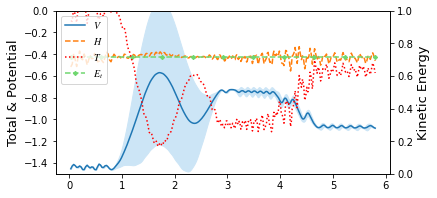

In [7]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :   1239   1426   1426   3.8353   0.7183
converg :   1241   1431   1431   3.8320   0.2647
jac_max > tol(0.01); Run without gradient
converg :   1242   1435   1435   3.8317   0.4227


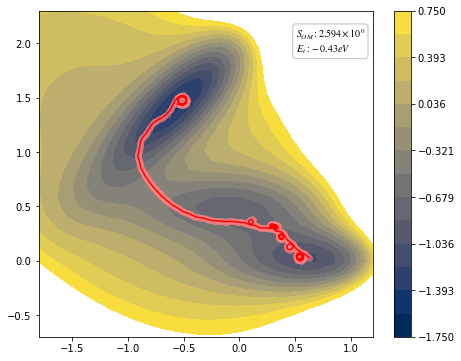

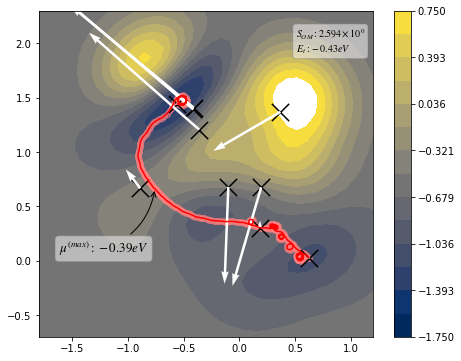

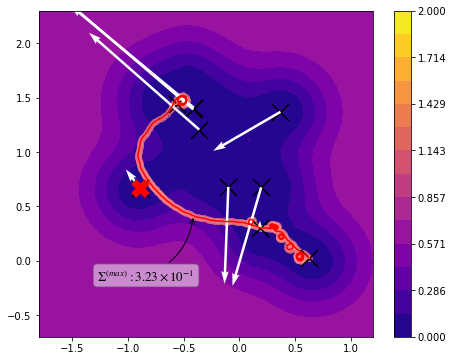

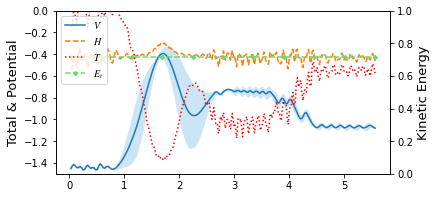

In [8]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :   1305   1503   1503   3.5874   0.8572
converg :   1307   1508   1508   3.5826   0.2798
jac_max > tol(0.01); Run without gradient
converg :   1344   1549   1549   3.5123   0.3315
jac_max > tol(0.01); Run without gradient
converg :   1346   1554   1554   3.5108   0.2930


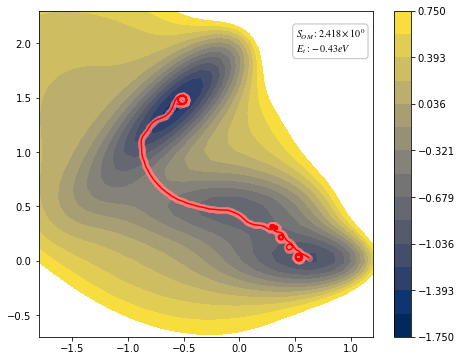

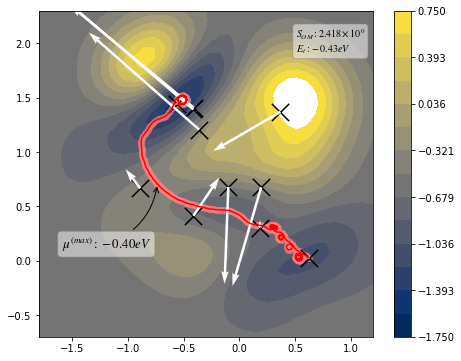

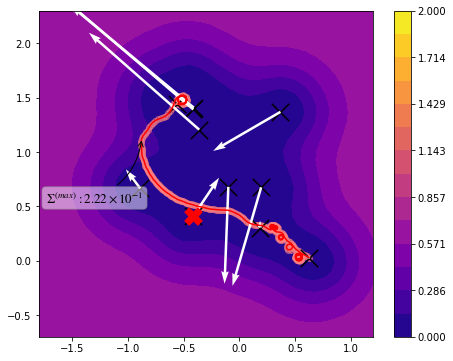

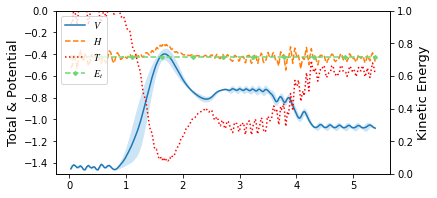

In [9]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.43
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :   1658   1873   1873   2.6339   0.6606
converg :   1660   1879   1879   2.6330   0.2818
jac_max > tol(0.01); Run without gradient
converg :   1661   1884   1884   2.6327   0.3838


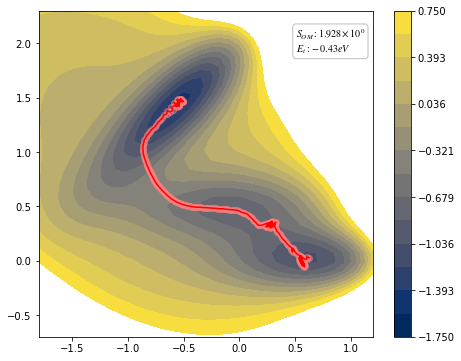

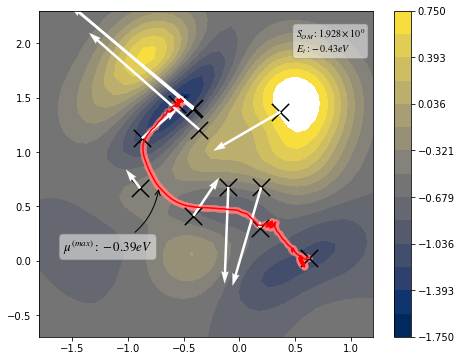

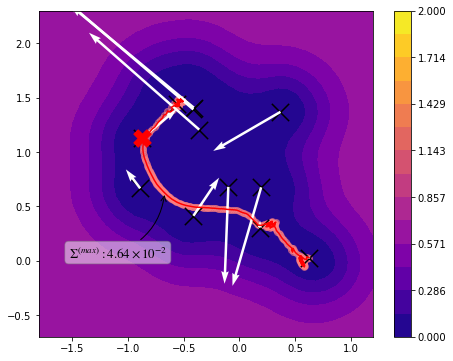

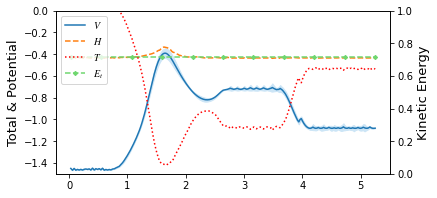

In [10]:
paths.real_finder.prj.Nk = N - 2
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

You can see the process of pathway being optimized throughout iteration. 